## Importing Neccessary Libraries

In [3]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [4]:
infected_data = os.listdir('cell_images/Parasitized/')
print(infected_data[:10])

uninfected_data = os.listdir('cell_images/Uninfected')
print('\n')
print(uninfected_data[:10])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']


['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144104_cell_34.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144104_cell_65.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png']


## Visualization of Infected and Uninfected Cells

1. Infected Data

TypeError: Image data of dtype object cannot be converted to float

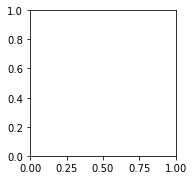

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/Extracting_folder/cell_images/Parasitized' + "/" + infected_data[i])
    plt.imshow(img)
    plt.title('INFECTED : 1')
    plt.tight_layout()
plt.show()

2. Unifected Data

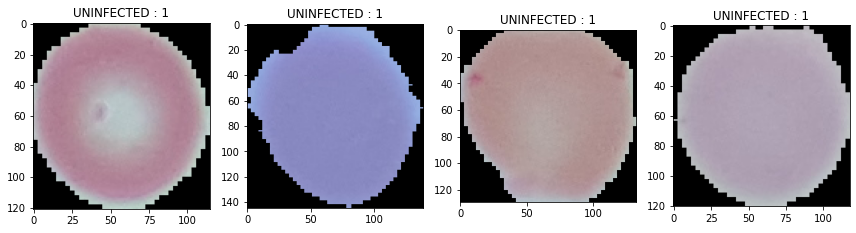

In [9]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/Extracting_folder/cell_images/Uninfected' + "/" + uninfected_data[i])
    plt.imshow(img)
    plt.title('UNINFECTED : 1')
    plt.tight_layout()
plt.show()

In [10]:
data = []
labels = []
for img in infected_data:
    try:
        img_read = plt.imread('/content/Extracting_folder/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        img_aray=img_array/255
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('/content/Extracting_folder/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        img_array= img_array/255
        data.append(img_array)
        labels.append(0)
    except:
        None

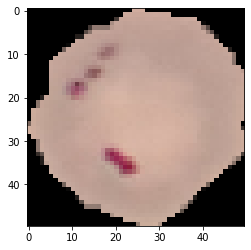

In [11]:
plt.imshow(data[0])
plt.show()

In [13]:
import numpy as np
image_data = np.array(data)
labels = np.array(labels)
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 42)

In [15]:
y_train = np_utils.to_categorical(y_train,  2)
y_test = np_utils.to_categorical(y_test,  2)

In [16]:
print(f'Shape of training image : {x_train.shape}')
print(f'Shape of testing image : {x_test.shape}')
print(f'Shape of training labels : {y_train.shape}')
print(f'Shape of testing labels : {y_test.shape}')

Shape of training image : (22046, 50, 50, 3)
Shape of testing image : (5512, 50, 50, 3)
Shape of training labels : (22046, 2)
Shape of testing labels : (5512, 2)


## The Architecture of the CNN model

In [17]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [18]:
inputShape= (50,50,3)
model=Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis =-1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Flatten())
    
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        1

In [20]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [21]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Epoch 1/25
689/689 [==============================] - 38s 7ms/step - loss: 0.0152 - accuracy: 0.9942 - val_loss: 2.3165e-07 - val_accuracy: 1.0000
Epoch 2/25
689/689 [==============================] - 4s 6ms/step - loss: 8.1348e-06 - accuracy: 1.0000 - val_loss: 8.9104e-09 - val_accuracy: 1.0000
Epoch 3/25
689/689 [==============================] - 4s 6ms/step - loss: 1.3917e-06 - accuracy: 1.0000 - val_loss: 6.0556e-10 - val_accuracy: 1.0000
Epoch 4/25
689/689 [==============================] - 4s 6ms/step - loss: 5.9297e-07 - accuracy: 1.0000 - val_loss: 7.4679e-08 - val_accuracy: 1.0000
Epoch 5/25
689/689 [==============================] - 4s 6ms/step - loss: 1.5589e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/25
689/689 [==============================] - 4s 6ms/step - loss: 7.9565e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/25
689/689 [==============================] - 4s 6ms/step - loss: 1.2629e-07 - accuracy: 1.0000

In [22]:
print(H.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


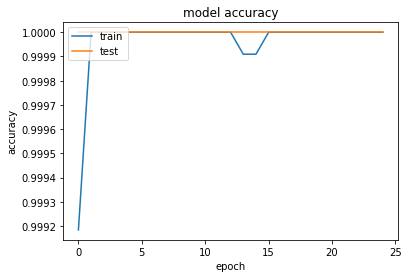

In [24]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

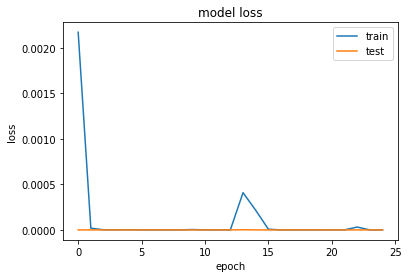

In [25]:
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [26]:
# make predictions on the test set
preds = model.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test.argmax(axis=1), preds.argmax(axis=1)))

1.0


In [28]:

from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2704
           1       1.00      1.00      1.00      2808

    accuracy                           1.00      5512
   macro avg       1.00      1.00      1.00      5512
weighted avg       1.00      1.00      1.00      5512



In [29]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    from sklearn.metrics import confusion_matrix
    from sklearn.utils.multiclass import unique_labels
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[2704    0]
 [   0 2808]]


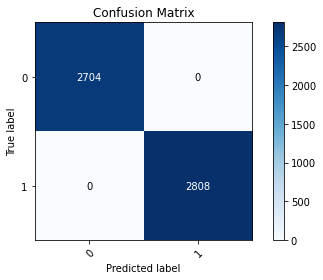

In [30]:
class_names=np.array((0,1))
plot_confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1), classes=class_names, title='Confusion Matrix')